In [4]:
%pylab inline
import glob
import numpy as np
import sys
import seaborn as sns
sys.path.append("/storage/BonnieH/selection_project/helper_functions")
from Joint_method_functions import *
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
PLOTDIR = '/storage/BonnieH/selection_project/joint_method/figures/validation_one_opt/plot_together/'

Populating the interactive namespace from numpy and matplotlib


/storage/BonnieH/anaconda/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
# PLot cdf of gamma distribution posterior estimates for real data

def main():
    print('Running main')
    
    folder = 't23'
    fig_num = 0
    pers = [2,3,4]
    #color_list = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','b','k']
    color_list = ['red','orange','gold','lawngreen','forestgreen','turquoise','blue','purple','brown','slategray']
    motif_dic = {}
    motif_dic[2] = ['AC','AG','AT']
    motif_dic[3] = ['ACC','AGG','AGC','CCG','AAG','AAC','ATC','AAT','ACT']
    motif_dic[4] = ['AAGG','AAAT','ATCC','AATC','AAAC','AATG','ACAT','AGAT','AAAG']
    
    opt_dic = {}
    opt_dic[2] = range(11,21,1)
    opt_dic[3] = range(5,14,1)
    opt_dic[4] = range(7,11,1)
    #clrs = sns.color_palette('husl', n_colors=10)
    color_dic_motif={}
    for per in pers:
        i = -1
    
        for motif in motif_dic[per]:
            i = i + 1
            color_dic_motif[motif] = color_list[i]
    
    color_dic_opt={}
    for per in pers:
        i = -1
        for opt in opt_dic[per]:
            i = i + 1
            color_dic_opt[(per, opt)] = color_list[i]
            
    # Plot motifs (sep graph for each opt allele)
    for per in pers:
        opt_alleles = opt_dic[per]
        print(per)
        for opt in opt_alleles:
            opt_string = str(opt)
            if opt < 10:
                opt_string = '0' + opt_string
            file_list = glob.glob('./results/results/%s/per_%d_*opt_%s.txt'%(folder, per, opt_string) )
            
            #print('New file_list')
            #print(file_list)
            file_list.sort() 
            base_plot = ''
            cum_dic = {}
            
            for filename in file_list:
               
                results_file = open(filename, 'r')
                lines = results_file.readlines()
                line = lines[9]
                info = line.strip().split(': ')
                num_acc = int(info[1])
                line = lines[1]
                info = line.strip().split(': ')
                num_loci = int(info[1])
                if num_acc > 0 and num_loci >= 10:

                    line = lines[2]
                    info = line.strip().split(': ')
                    motif = info[2]
                    motif = motif.strip().split(' ')
                    motif = motif[0]
                    opt_allele = int(info[3])
                    if motif != '1.0' and motif != '0.0':
                        line = lines[11]
                        info = line.strip().split(',')
                        k = float(info[0])
                        theta = float(info[1])

                        s = [] # List of s values drawn from gamma distribution
                        num_sims = 10000
                        for i in range(0, num_sims):
                            s_val = np.random.gamma(k, theta)
                            if s_val > 0.1:
                                s_val = 0.1

                            s.append(s_val)

                        bins_list = [0]
                        exponents = [10**-5, 10**-4, 10**-3, 10**-2]
                        for j in exponents:
                            for i in np.arange(1,10,0.1):
                                bins_list.append(i*j)

                        bins_list.append(0.1)
                        bins_list.append(1)

                        values, base = np.histogram(s, bins=bins_list)# [0,10**-5,10**-4,10**-3,10**-2,10**-1,1]#[0,10**-5,10**-4,10**-3,10**-2,10**-1,1]

                        cumulative = np.cumsum(values)

                        cum_dic[(motif, opt_allele, num_loci)] = cumulative
                        base_plot = base
               
            # Plot CDF
            color_num = -1
            fig_num = fig_num + 1
            plt.figure(fig_num)
            for elem in cum_dic:
                
                if elem[1] != 0:
                    color_num = color_num + 1
                    plt.plot(base_plot[:-1], cum_dic[elem], label = elem[0] + ' opt ' + str(elem[1]) + ' (' + str(elem[2]) + ' loci)', color=color_dic_motif[elem[0]], linewidth = 2) #color_dic[elem[0]] color_list[color_num]
                else:
                    plt.plot(base_plot[:-1], cum_dic[elem], label = elem[0] + ' all opt', color='black', linewidth = 3)
            plt.xlim(10**-5, 0.1)
            plt.xscale('log')
            plt.title('Distribution of s values: joint method\n' + 'Per ' + str(per) + ' Opt allele ' + str(elem[1]))
            plt.xlabel('s')
            plt.legend()

            yticks([0, 2000, 4000, 6000, 8000, 10000], ['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
            plt.ylabel('Cumulative Frequency')
            plt.show()
    print('Done')

Running main
2


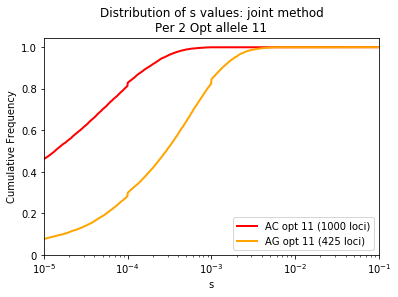

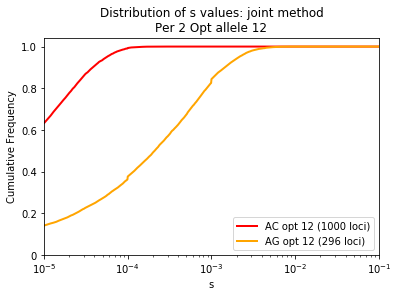

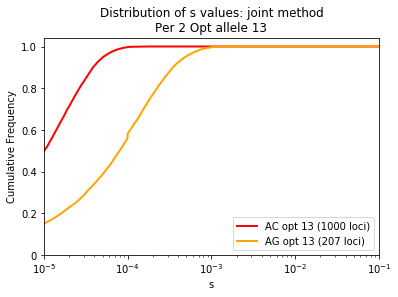

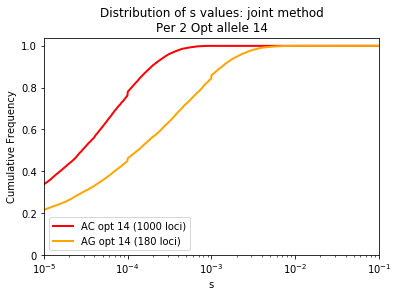

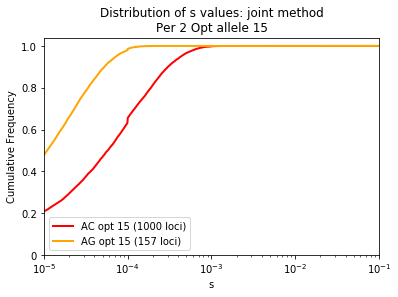

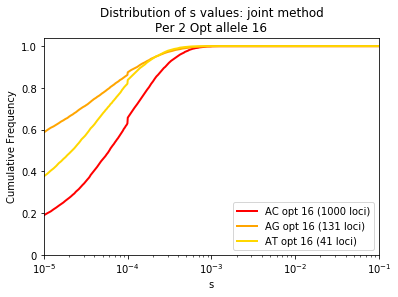

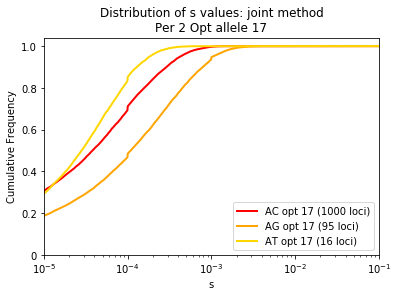

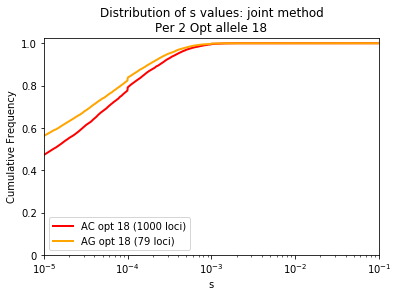

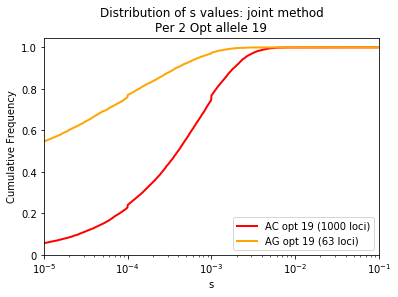

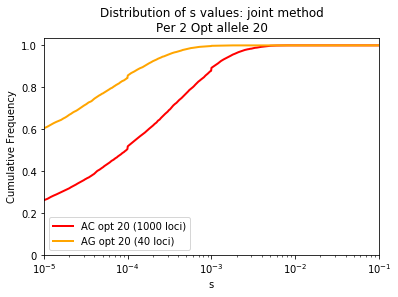

3


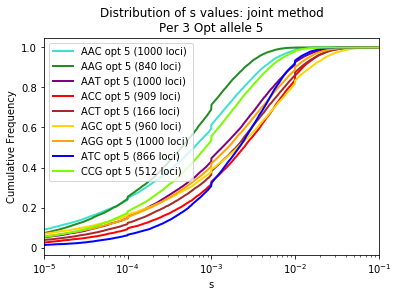

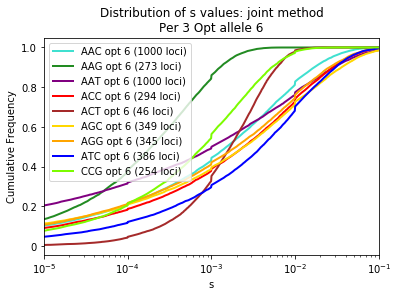

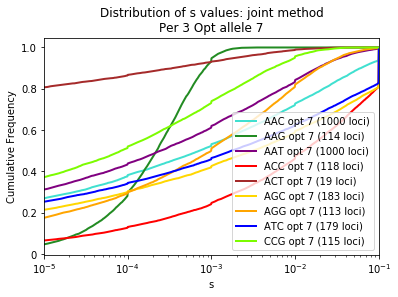

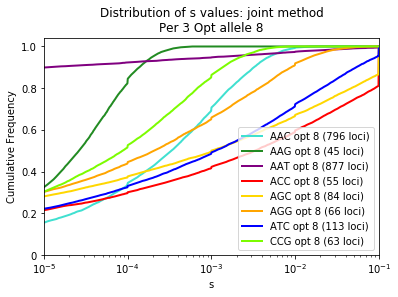

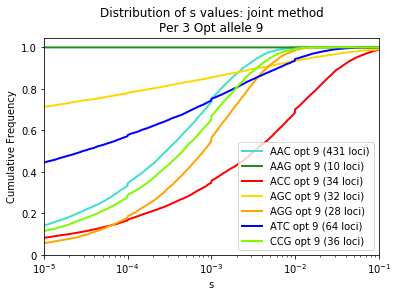

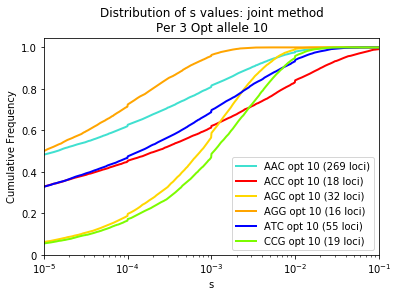

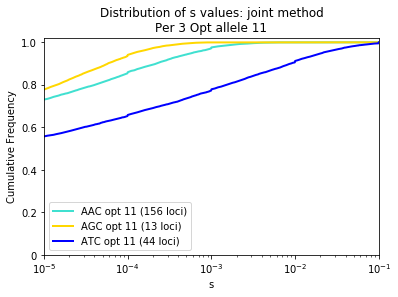

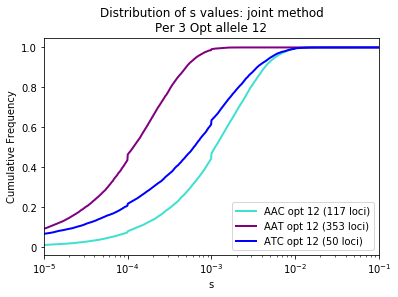

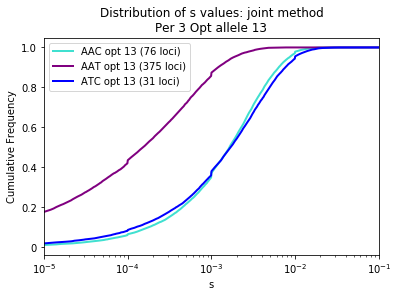

4


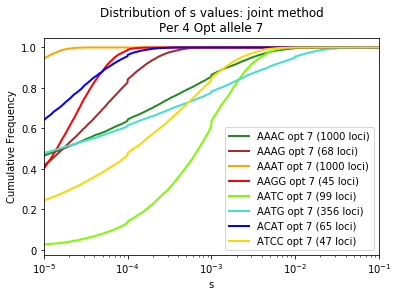

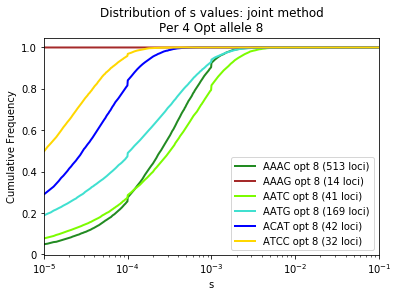

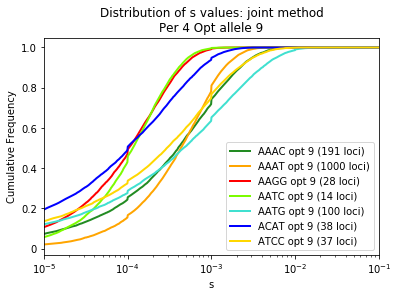

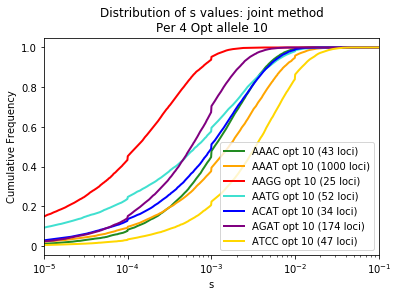

Done
CPU times: user 22.9 s, sys: 755 ms, total: 23.6 s
Wall time: 34.4 s


In [6]:
%%time
if __name__ == '__main__':
    main()